You can order print and ebook versions of *Think Python 3e* from
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) and
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

Downloaded thinkpython.py
Downloaded diagram.py


# Strings and Regular Expressions

Strings are not like integers, floats, and booleans. A string is a **sequence**, which means it contains multiple values in a particular order.
In this chapter we'll see how to access the values that make up a string, and we'll use functions that process strings.

We'll also use regular expressions, which are a powerful tool for finding patterns in a string and performing operations like search and replace.

As an exercise, you'll have a chance to apply these tools to a word game called Wordle.

## A string is a sequence

A string is a sequence of characters. A **character** can be a letter (in almost any alphabet), a digit, a punctuation mark, or white space.

You can select a character from a string with the bracket operator.
This example statement selects character number 1 from `fruit` and
assigns it to `letter`:

In [2]:
fruit = 'banana'
letter = fruit[1]

The expression in brackets is an **index**, so called because it *indicates* which character in the sequence to select.
But the result might not be what you expect.

In [4]:
letter

'a'

The letter with index `1` is actually the second letter of the string.
An index is an offset from the beginning of the string, so the offset of the first letter is `0`.

In [5]:
fruit[0]

'b'

You can think of `'b'` as the 0th letter of `'banana'` -- pronounced "zero-eth".

The index in brackets can be a variable.

In [6]:
i = 1
fruit[i]

'a'

Or an expression that contains variables and operators.

In [7]:
fruit[i+1]

'n'

But the value of the index has to be an integer -- otherwise you get a `TypeError`.

In [8]:
%%expect TypeError

fruit[1.5]

TypeError: string indices must be integers, not 'float'

As we saw in Chapter 1, we can use the built-in function `len` to get the length of a string.

In [9]:
n = len(fruit)
n

6

To get the last letter of a string, you might be tempted to write this:

In [10]:
%%expect IndexError

fruit[n]

IndexError: string index out of range

But that causes an `IndexError` because there is no letter in `'banana'` with the index 6. Because we started counting at `0`, the six letters are numbered `0` to `5`. To get the last character, you have to subtract `1` from `n`:

In [11]:
fruit[n-1]

'a'

But there's an easier way.
To get the last letter in a string, you can use a negative index, which counts backward from the end.

In [14]:
fruit[-2]

'n'

The index `-1` selects the last letter, `-2` selects the second to last, and so on.

## String slices

A segment of a string is called a **slice**.
Selecting a slice is similar to selecting a character.

In [15]:
fruit = 'banana'
fruit[0:3]

'ban'

The operator `[n:m]` returns the part of the string from the `n`th
character to the `m`th character, including the first but excluding the second.
This behavior is counterintuitive, but it might help to imagine the indices pointing *between* the characters, as in this figure:

In [16]:
from diagram import make_binding, Element, Value

binding = make_binding("fruit", ' b a n a n a ')
elements = [Element(Value(i), None) for i in range(7)]

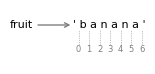

In [17]:
import matplotlib.pyplot as plt
from diagram import diagram, adjust
from matplotlib.transforms import Bbox

width, height, x, y = [1.35, 0.54, 0.23, 0.39]

ax = diagram(width, height)
bbox = binding.draw(ax, x, y)
bboxes = [bbox]

def draw_elts(x, y, elements):
    for elt in elements:
        bbox = elt.draw(ax, x, y, draw_value=False)
        bboxes.append(bbox)

        x1 = (bbox.xmin + bbox.xmax) / 2
        y1 = bbox.ymax + 0.02
        y2 = y1 + 0.14
        handle = plt.plot([x1, x1], [y1, y2], ':', lw=0.5, color='gray')
        x += 0.105

draw_elts(x + 0.48, y - 0.25, elements)
bbox = Bbox.union(bboxes)
# adjust(x, y, bbox)

For example, the slice `[3:6]` selects the letters `ana`, which means that `6` is legal as part of a slice, but not legal as an index.


If you omit the first index, the slice starts at the beginning of the string.

In [18]:
fruit[:3]

'ban'

If you omit the second index, the slice goes to the end of the string:

In [19]:
fruit[3:]

'ana'

If the first index is greater than or equal to the second, the result is an **empty string**, represented by two quotation marks:

In [20]:
fruit[3:3]

''

An empty string contains no characters and has length 0.

Continuing this example, what do you think `fruit[:]` means? Try it and
see.

In [21]:
fruit[:]

'banana'

## Strings are immutable

It is tempting to use the `[]` operator on the left side of an
assignment, with the intention of changing a character in a string, like this:

In [22]:
%%expect TypeError

greeting = 'Hello, world!'
greeting[0] = 'J'

TypeError: 'str' object does not support item assignment

The result is a `TypeError`.
In the error message, the "object" is the string and the "item" is the character
we tried to assign.
For now, an **object** is the same thing as a value, but we will refine that definition later.

The reason for this error is that strings are **immutable**, which means you can't change an existing string.
The best you can do is create a new string that is a variation of the original.

In [23]:
new_greeting = 'J' + greeting[1:]
new_greeting

'Jello, world!'

This example concatenates a new first letter onto a slice of `greeting`.
It has no effect on the original string.

In [24]:
greeting

'Hello, world!'

## String comparison

The relational operators work on strings. To see if two strings are
equal, we can use the `==` operator.

In [25]:
word = 'banana'

if word == 'banana':
    print('All right, banana.')

All right, banana.


Other relational operations are useful for putting words in alphabetical
order:

In [27]:
def compare_word(word):
    if word < 'banana':
        print(word, 'comes before banana.')
    elif word > 'banana':
        print(word, 'comes after banana.')
    else:
        print('All right, banana.')

In [28]:
compare_word('apple')

apple comes before banana.


Python does not handle uppercase and lowercase letters the same way
people do. All the uppercase letters come before all the lowercase
letters, so:

In [29]:
compare_word('Pineapple')

Pineapple comes before banana.


To solve this problem, we can convert strings to a standard format, such as all lowercase, before performing the comparison.
Keep that in mind if you have to defend yourself against a man armed with a Pineapple.

## String methods

Strings provide methods that perform a variety of useful operations.
A method is similar to a function -- it takes arguments and returns a value -- but the syntax is different.
For example, the method `upper` takes a string and returns a new string with all uppercase letters.

Instead of the function syntax `upper(word)`, it uses the method syntax `word.upper()`.

In [30]:
word = 'banana'
new_word = word.upper()
new_word

'BANANA'

This use of the dot operator specifies the name of the method, `upper`, and the name of the string to apply the method to, `word`.
The empty parentheses indicate that this method takes no arguments.

A method call is called an **invocation**; in this case, we would say that we are invoking `upper` on `word`.

## Writing files

String operators and methods are useful for reading and writing text files.
As an example, we'll work with the text of *Dracula*, a novel by Bram Stoker that is available from Project Gutenberg (<https://www.gutenberg.org/ebooks/345>).

In [31]:
import os

if not os.path.exists('pg345.txt'):
    !wget https://www.gutenberg.org/cache/epub/345/pg345.txt

--2025-10-28 06:08:39--  https://www.gutenberg.org/cache/epub/345/pg345.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 890391 (870K) [text/plain]
Saving to: ‘pg345.txt’

pg345.txt           100%[===================>] 869.52K  --.-KB/s    in 0.1s    

2025-10-28 06:08:40 (5.97 MB/s) - ‘pg345.txt’ saved [890391/890391]



I've downloaded the book in a plain text file called `pg345.txt`, which we can open for reading like this:

In [32]:
reader = open('pg345.txt')

In addition to the text of the book, this file contains a section at the beginning with information about the book and a section at the end with information about the license.
Before we process the text, we can remove this extra material by finding the special lines at the beginning and end that begin with `'***'`.

The following function takes a line and checks whether it is one of the special lines.
It uses the `startswith` method, which checks whether a string starts with a given sequence of characters.

In [33]:
def is_special_line(line):
    return line.startswith('*** ')

We can use this function to loop through the lines in the file and print only the special lines.

In [34]:
for line in reader:
    if is_special_line(line):
        print(line.strip())

*** START OF THE PROJECT GUTENBERG EBOOK DRACULA ***
*** END OF THE PROJECT GUTENBERG EBOOK DRACULA ***


Now let's create a new file, called `pg345_cleaned.txt`, that contains only the text of the book.
In order to loop through the book again, we have to open it again for reading.
And, to write a new file, we can open it for writing.

In [35]:
reader = open('pg345.txt')
writer = open('pg345_cleaned.txt', 'w')

`open` takes an optional parameters that specifies the "mode" -- in this example, `'w'` indicates that we're opening the file for writing.
If the file doesn't exist, it will be created; if it already exists, the contents will be replaced.

As a first step, we'll loop through the file until we find the first special line.

In [38]:
for line in reader:
    if is_special_line(line):
        break

The `break` statement "breaks" out of the loop -- that is, it causes the loop to end immediately, before we get to the end of the file.

When the loop exits, `line` contains the special line that made the conditional true.

In [39]:
line

'*** END OF THE PROJECT GUTENBERG EBOOK DRACULA ***\n'

Because `reader` keeps track of where it is in the file, we can use a second loop to pick up where we left off.

The following loop reads the rest of the file, one line at a time.
When it finds the special line that indicates the end of the text, it breaks out of the loop.
Otherwise, it writes the line to the output file.

In [41]:
for line in reader:
    if is_special_line(line):
        break
    writer.write(line)

When this loop exits, `line` contains the second special line.

In [42]:
line

'\n'

At this point `reader` and `writer` are still open, which means we could keep reading lines from `reader` or writing lines to `writer`.
To indicate that we're done, we can close both files by invoking the `close` method.

In [43]:
reader.close()
writer.close()

To check whether this process was successful, we can read the first few lines from the new file we just created.

In [44]:
for line in open('pg345_cleaned.txt'):
    line = line.strip()
    if len(line) > 0:
        print(line)
    if line.endswith('Stoker'):
        break

Updated editions will replace the previous one—the old editions will
be renamed.
Creating the works from print editions not protected by U.S. copyright
law means that no one owns a United States copyright in these works,
so the Foundation (and you!) can copy and distribute it in the United
States without permission and without paying copyright
royalties. Special rules, set forth in the General Terms of Use part
of this license, apply to copying and distributing Project
Gutenberg™ electronic works to protect the PROJECT GUTENBERG™
concept and trademark. Project Gutenberg is a registered trademark,
and may not be used if you charge for an eBook, except by following
the terms of the trademark license, including paying royalties for use
of the Project Gutenberg trademark. If you do not charge anything for
copies of this eBook, complying with the trademark license is very
easy. You may use this eBook for nearly any purpose such as creation
of derivative works, reports, performances and rese

The `endswith` method checks whether a string ends with a given sequence of characters.

## Find and replace

In the Icelandic translation of *Dracula* from 1901, the name of one of the characters was changed from "Jonathan" to "Thomas".
To make this change in the English version, we can loop through the book, use the `replace` method to replace one name with another, and write the result to a new file.

We'll start by counting the lines in the cleaned version of the file.

In [45]:
total = 0
for line in open('pg345_cleaned.txt'):
    total += 1

total

350

To see whether a line contains "Jonathan", we can use the `in` operator, which checks whether this sequence of characters appears anywhere in the line.

In [ ]:
total = 0
for line in open('pg345_cleaned.txt'):
    if 'Jonathan' in line:
        total += 1

total

There are 199 lines that contain the name, but that's not quite the total number of times it appears, because it can appear more than once in a line.
To get the total, we can use the `count` method, which returns the number of times a sequence appears in a string.

In [46]:
total = 0
for line in open('pg345_cleaned.txt'):
    total += line.count('Jonathan')

total

0

Now we can replace `'Jonathan'` with `'Thomas'` like this:

In [47]:
writer = open('pg345_replaced.txt', 'w')

for line in open('pg345_cleaned.txt'):
    line = line.replace('Jonathan', 'Thomas')
    writer.write(line)

The result is a new file called `pg345_replaced.txt` that contains a version of *Dracula* where Jonathan Harker is called Thomas.

In [48]:
total = 0
for line in open('pg345_replaced.txt'):
    total += line.count('Thomas')

total

0

## Regular expressions

If we know exactly what sequence of characters we're looking for, we can use the `in` operator to find it and the `replace` method to replace it.
But there is another tool, called a **regular expression** that can also perform these operations -- and a lot more.

To demonstrate, I'll start with a simple example and we'll work our way up.
Suppose, again, that we want to find all lines that contain a particular word.
For a change, let's look for references to the titular character of the book, Count Dracula.
Here's a line that mentions him.

In [65]:
text = "I am Dracula; and I bid you welcome, Mr. Harker, to my house."

And here's the **pattern** we'll use to search.

In [66]:
pattern = 'Dracula'

A module called `re` provides functions related to regular expressions.
We can import it like this and use the `search` function to check whether the pattern appears in the text.

In [67]:
import re

result = re.search(pattern, text)
result

<re.Match object; span=(5, 12), match='Dracula'>

If the pattern appears in the text, `search` returns a `Match` object that contains the results of the search.
Among other information, it has a variable named `string` that contains the text that was searched.

In [68]:
result.string

'I am Dracula; and I bid you welcome, Mr. Harker, to my house.'

It also provides a method called `group` that returns the part of the text that matched the pattern.

In [69]:
result.group()

'Dracula'

And it provides a method called `span` that returns the index in the text where the pattern starts and ends.

In [70]:
result.span()

(5, 12)

If the pattern doesn't appear in the text, the return value from `search` is `None`.

In [71]:
result = re.search('Count', text)
print(result)

None


So we can check whether the search was successful by checking whether the result is `None`.

In [72]:
result == None

True

Putting all that together, here's a function that loops through the lines in the book until it finds one that matches the given pattern, and returns the `Match` object.

In [73]:
def find_first(pattern):
    for line in open('pg345_cleaned.txt'):
        result = re.search(pattern, line)
        if result != None:
            return result

We can use it to find the first mention of a character.

In [81]:
result = find_first('Harker')
result.string

For this example, we didn't have to use regular expressions -- we could have done the same thing more easily with the `in` operator.
But regular expressions can do things the `in` operator cannot.

For example, if the pattern includes the vertical bar character, `'|'`, it can match either the sequence on the left or the sequence on the right.
Suppose we want to find the first mention of Mina Murray in the book, but we are not sure whether she is referred to by first name or last.
We can use the following pattern, which matches either name.

In [ ]:
pattern = 'Mina|Murray'
result = find_first(pattern)
result.string

We can use a pattern like this to see how many times a character is mentioned by either name.
Here's a function that loops through the book and counts the number of lines that match the given pattern.

In [ ]:
def count_matches(pattern):
    count = 0
    for line in open('pg345_cleaned.txt'):
        result = re.search(pattern, line)
        if result != None:
            count += 1
    return count

Now let's see how many times Mina is mentioned.

In [ ]:
count_matches('Mina|Murray')

The special character `'^'` matches the beginning of a string, so we can find a line that starts with a given pattern.

In [ ]:
result = find_first('^Dracula')
result.string

And the special character `'$'` matches the end of a string, so we can find a line that ends with a given pattern (ignoring the newline at the end).

In [ ]:
result = find_first('Harker$')
result.string

## String substitution

Bram Stoker was born in Ireland, and when *Dracula* was published in 1897, he was living in England.
So we would expect him to use the British spelling of words like "centre" and "colour".
To check, we can use the following pattern, which matches either "centre" or the American spelling "center".

In [ ]:
pattern = 'cent(er|re)'

In this pattern, the parentheses enclose the part of the pattern the vertical bar applies to.
So this pattern matches a sequence that starts with `'cent'` and ends with either `'er'` or `'re'`.

In [ ]:
result = find_first(pattern)
result.string

As expected, he used the British spelling.

We can also check whether he used the British spelling of "colour".
The following pattern uses the special character `'?'`, which means that the previous character is optional.

In [ ]:
pattern = 'colou?r'

This pattern matches either "colour" with the `'u'` or "color" without it.

In [ ]:
result = find_first(pattern)
line = result.string
line

Again, as expected, he used the British spelling.

Now suppose we want to produce an edition of the book with American spellings.
We can use the `sub` function in the `re` module, which does **string substitution**.

In [ ]:
re.sub(pattern, 'color', line)

The first argument is the pattern we want to find and replace, the second is what we want to replace it with, and the third is the string we want to search.
In the result, you can see that "colour" has been replaced with "color".

In [ ]:
# I used this function to search for lines to use as examples

def all_matches(pattern):
    for line in open('pg345_cleaned.txt'):
        result = re.search(pattern, line)
        if result:
            print(line.strip())

In [ ]:
# Here's the pattern I used (which uses some features we haven't seen)

names = r'(?<!\.\s)[A-Z][a-zA-Z]+'

all_matches(names)

## Debugging

When you are reading and writing files, debugging can be tricky.
If you are working in a Jupyter notebook, you can use **shell commands** to help.
For example, to display the first few lines of a file, you can use the command `!head`, like this:

In [ ]:
!head pg345_cleaned.txt

The initial exclamation point, `!`, indicates that this is a shell command, which is not part of Python.
To display the last few lines, you can use `!tail`.

In [ ]:
!tail pg345_cleaned.txt

When you are working with large files, debugging can be difficult because there might be too much output to check by hand.
A good debugging strategy is to start with just part of the file, get the program working, and then run it with the whole file.

To make a small file that contains part of a larger file, we can use `!head` again with the redirect operator, `>`, which indicates that the results should be written to a file rather than displayed.

In [ ]:
!head pg345_cleaned.txt > pg345_cleaned_10_lines.txt

By default, `!head` reads the first 10 lines, but it takes an optional argument that indicates the number of lines to read.

In [ ]:
!head -100 pg345_cleaned.txt > pg345_cleaned_100_lines.txt

This shell command reads the first 100 lines from `pg345_cleaned.txt` and writes them to a file called `pg345_cleaned_100_lines.txt`.

Note: The shell commands `!head` and `!tail` are not available on all operating systems.
If they don't work for you, we can write similar functions in Python.
See the first exercise at the end of this chapter for suggestions.

## Glossary

**sequence:**
 An ordered collection of values where each value is identified by an integer index.

**character:**
An element of a string, including letters, numbers, and symbols.

**index:**
 An integer value used to select an item in a sequence, such as a character in a string. In Python indices start from `0`.

**slice:**
 A part of a string specified by a range of indices.

**empty string:**
A string that contains no characters and has length `0`.

**object:**
 Something a variable can refer to. An object has a type and a value.

**immutable:**
If the elements of an object cannot be changed, the object is immutable.

**invocation:**
 An expression -- or part of an expression -- that calls a method.

**regular expression:**
A sequence of characters that defines a search pattern.

**pattern:**
A rule that specifies the requirements a string has to meet to constitute a match.

**string substitution:**
Replacement of a string, or part of a string, with another string.

**shell command:**
A statement in a shell language, which is a language used to interact with an operating system.

## Exercises

In [83]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

Exception reporting mode: Verbose


In [84]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt');

Downloaded words.txt


### Ask a virtual assistant

In this chapter, we only scratched the surface of what regular expressions can do.
To get an idea of what's possible, ask a virtual assistant, "What are the most common special characters used in Python regular expressions?"

You can also ask for a pattern that matches particular kinds of strings.
For example, try asking:

* Write a Python regular expression that matches a 10-digit phone number with hyphens.

* Write a Python regular expression that matches a street address with a number and a street name, followed by `ST` or `AVE`.

* Write a Python regular expression that matches a full name with any common title like `Mr` or `Mrs` followed by any number of names beginning with capital letters, possibly with hyphens between some names.

And if you want to see something more complicated, try asking for a regular expression that matches any legal URL.

A regular expression often has the letter `r` before the quotation mark, which indicates that it is a "raw string".
For more information, ask a virtual assistant, "What is a raw string in Python?"

In [82]:
from doctest import run_docstring_examples

def run_doctests(func):
    run_docstring_examples(func, globals(), name=func.__name__)

### Exercise

See if you can write a function that does the same thing as the shell command `!head`.
It should take as arguments the name of a file to read, the number of lines to read, and the name of the file to write the lines into.
If the third parameter is `None`, it should display the lines rather than write them to a file.

Consider asking a virtual assistant for help, but if you do, tell it not to use a `with` statement or a `try` statement.

In [ ]:
# Solution goes here

You can use the following examples to test your function.

In [ ]:
head('pg345_cleaned.txt', 10)

In [ ]:
head('pg345_cleaned.txt', 100, 'pg345_cleaned_100_lines.txt')

In [ ]:
!tail pg345_cleaned_100_lines.txt

### Exercise

"Wordle" is an online word game where the objective is to guess a five-letter word in six or fewer attempts.
Each attempt has to be recognized as a word, not including proper nouns.
After each attempt, you get information about which of the letters you guessed appear in the target word, and which ones are in the correct position.

For example, suppose the target word is `MOWER` and you guess `TRIED`.
You would learn that `E` is in the word and in the correct position, `R` is in the word but not in the correct position, and `T`, `I`, and `D` are not in the word.

As a different example, suppose you have guessed the words `SPADE` and `CLERK`, and you've learned that `E` is in the word, but not in either of those positions, and none of the other letters appear in the word.
Of the words in the word list, how many could be the target word?
Write a function called `check_word` that takes a five-letter word and checks whether it could be the target word, given these guesses.

In [ ]:
# Solution goes here

You can use any of the functions from the previous chapter, like `uses_any`.

In [ ]:
def uses_any(word, letters):
    for letter in word.lower():
        if letter in letters.lower():
            return True
    return False

You can use the following loop to test your function.

In [ ]:
for line in open('words.txt'):
    word = line.strip()
    if len(word) == 5 and check_word(word):
        print(word)

### Exercise

Continuing the previous exercise, suppose you guess the work `TOTEM` and learn that the `E` is *still* not in the right place, but the `M` is. How many words are left?

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

### Exercise

*The Count of Monte Cristo* is a novel by Alexandre Dumas that is considered a classic.
Nevertheless, in the introduction of an English translation of the book, the writer Umberto Eco confesses that he found the book to be "one of the most badly written novels of all time".

In particular, he says it is "shameless in its repetition of the same adjective," and mentions in particular the number of times "its characters either shudder or turn pale."

To see whether his objection is valid, let's count the number number of lines that contain the word `pale` in any form, including `pale`, `pales`, `paled`, and `paleness`, as well as the related word `pallor`.
Use a single regular expression that matches any of these words.
As an additional challenge, make sure that it doesn't match any other words, like `impale` -- you might want to ask a virtual assistant for help.

The following cell downloads the book from Project Gutenberg <https://www.gutenberg.org/ebooks/1184>.

In [ ]:
import os

if not os.path.exists('pg1184.txt'):
    !wget https://www.gutenberg.org/cache/epub/1184/pg1184.txt

The following cell runs a function that reads the file from Project Gutenberg and writes a file that contains only the text of the book, not the added information about the book.

In [ ]:
def clean_file(input_file, output_file):
    reader = open(input_file)
    writer = open(output_file, 'w')

    for line in reader:
        if is_special_line(line):
            break

    for line in reader:
        if is_special_line(line):
            break
        writer.write(line)

    reader.close()
    writer.close()

clean_file('pg1184.txt', 'pg1184_cleaned.txt')

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

By this count, these words appear on `223` lines of the book, so Mr. Eco might have a point.

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)